Optimized Parameters:
A1: 0.01704253266150002
g1: 0.7017612250040417
A2: 0.0
g2: 0.9959603836083163
kb1: 0.0008935059275394967
b1: 0.042210305980678806
kb2: 1.1214535538162218
b2: 0.1145703496988455


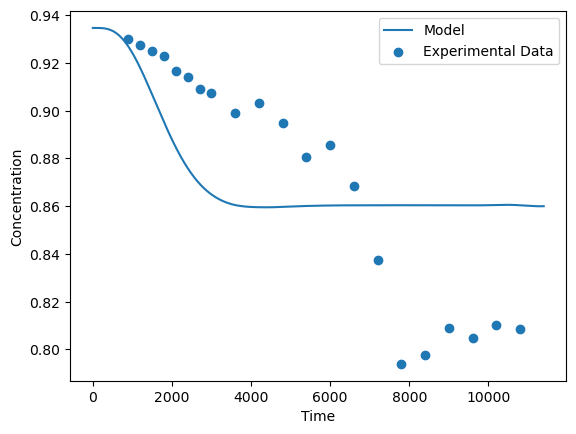

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Given data
Time=np.array([900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800])
Concentration=np.array([0.9298566259,0.9273753617,0.9249580909,0.9228644065,0.9167521496,0.9141323339,0.9089792409,0.9074454554,0.898869261,0.903062857,0.8949772304,0.8805239819,0.8854835155,0.8683936374,0.8374843377,0.7938727652,0.7975493067,0.808957393,0.8046940862,0.8099867757,0.8083711434])
def generateODE2(t, m, A1, g1, A2, g2, kb1, b1,kb2,b2, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.9346                     # gm/(100 gm of mixed solvent)
    Ce = 0.70325                      # gm/(100 gm of mixed solvent)
    
    
    #calulate neccessary quantity
    
    f = 3.33 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb1 * (s)**b1  + kb2*Vc*s**b2

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc

    return [dm00, dm10, dm01, dm11, dc]

def objective(params):
    A1, g1, A2, g2, kb1, b1, kb2, b2  = params
    V = 0.0002  # Volume, adjust as needed
    t_span = (0, 11400)  # Adjust this to match the maximum time in your data
    num_points = 11400
    initialConditions = [0, 0, 0, 0, 0.9346]
    sol = solve_ivp(
        lambda t, m: generateODE2(t, m, A1, g1, A2, g2, kb1, b1,kb2,b2, V),
        t_span,
        initialConditions,
        t_eval=np.linspace(t_span[0], t_span[1], num_points)
    )
    
    # Ensure that the interpolation is within the range of the solution
    interp_t = np.clip(Time, sol.t[0], sol.t[-1])
    
    # Interpolate the solution at the time points specified in Time
    interp_solution = interp1d(sol.t, sol.y[4], bounds_error=False, fill_value="extrapolate")
    model_predictions = interp_solution(Time)
    error = np.sum((model_predictions - Concentration)**2)  # Sum of squared differences
    return error

# Initial guess for parameters
initial_guess =  [0.00001313983, 1, 0.00002593650, 1.43, 0.03, 0.19, 1.12,0.1172]

# Bounds for the parameters
bounds = [(0, 0.1),   # A1
          (0, 2),      # g1
          (0, 0.01),     # A2
          (0, 1),        # g2
          (0, 2),        # kb1
          (0, 2),          #b1
         (0, 2),         #kb2
         (0,2)]         # b2

# Minimize the objective function with bounds
result = minimize(objective, initial_guess, method='L-BFGS-B', bounds=bounds)
# Extract the optimized parameters
A1_opt, g1_opt, A2_opt, g2_opt, kb1_opt, b1_opt, kb2_opt, b2_opt = result.x
print("Optimized Parameters:")
print("A1:", A1_opt)
print("g1:", g1_opt)
print("A2:", A2_opt)
print("g2:", g2_opt)
print("kb1:", kb1_opt)
print("b1:", b1_opt)
print("kb2:", kb2_opt)
print("b2:", b2_opt)

# Plot the optimized model against the data
t_span = (0, 11400)
num_points = 11400
initialConditions = [0, 0, 0, 0, 0.9346]
sol = solve_ivp(
    lambda t, m: generateODE2(t, m, A1_opt, g1_opt, A2_opt, g2_opt, kb1_opt, b1_opt, kb2_opt, b2_opt, 0.0002),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)
plt.plot(sol.t, sol.y[4], label='Model')
plt.scatter(Time, Concentration, label='Experimental Data')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

In [ ]:
def generateODE7(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.9346                     # gm/(100 gm of mixed solvent)
    Ce = 0.70325                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    
    A1= 0.001
    g1= 1.3674422124010206
    A2= 0.001
    g2= 0.8806401378356327
    kb= 1.9159735378591962
    b= 0.11727791169769848
    
    f = 3.33 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    
        
    return [dm00, dm10, dm01, dm11, dc]
t_span7 = (0, 12000)  # Adjust this to match the maximum time in your data
num_points7 = 12000
initialConditions7 = [0, 0, 0, 0, 0.9346]
sol7 = solve_ivp(
    lambda t, m: generateODE7(t, m),
    t_span7,
    initialConditions7,
    t_eval=np.linspace(t_span7[0], t_span7[1], num_points7)
)
Time7=[900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800]
Concentration7=[0.9298566259,0.9273753617,0.9249580909,0.9228644065,0.9167521496,0.9141323339,0.9089792409,0.9074454554,0.898869261,0.903062857,0.8949772304,0.8805239819,0.8854835155,0.8683936374,0.8374843377,0.7938727652,0.7975493067,0.808957393,0.8046940862,0.8099867757,0.8083711434]
plt.scatter(Time7, Concentration7)
plt.plot(sol7.t,sol7.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")